In [10]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

In [2]:
class QuadraticState(TypedDict):
    a : int
    b : int
    c : int
    eq : str
    discriminant : float
    result : str

In [17]:
def calc_equation(state: QuadraticState) -> QuadraticState:
    eq = f"{state['a']}x2 + {state['b']}x + {state['c']}"

    return {'eq': eq}


def calc_discriminant(state: QuadraticState) -> QuadraticState:
    discriminant = state['b']**2 - (4*state['a']*state['c'])

    return {'discriminant': discriminant}


def real_roots(state: QuadraticState) -> QuadraticState:
    root1 = (-state['b'] + state['discriminant']**0.5)/(2*state['a'])
    root2 = (-state['b'] - state['discriminant']**0.5)/(2*state['a'])

    result = f"Real roots are {root1} and {root2}"

    return {'result': result}


def repeated_root(state: QuadraticState)-> QuadraticState:
    root = -(state['b'])/(2**state['a'])

    result = f"Repeated root is {root}"

    return {'result': result}

def no_real_roots(state: QuadraticState)-> QuadraticState:
    result = "No real roots"

    return {'result': result}
    

def check_condition(state: QuadraticState) -> Literal["real_roots", "repeated_root", "no_real_roots"]:
    if state['discriminant'] > 0:
        return "real_roots"
    elif state['discriminant'] == 0:
        return "repeated_root"
    else:
        return "no_real_roots"

In [18]:
graph = StateGraph(QuadraticState)

graph.add_node('calc_equation', calc_equation)
graph.add_node('calc_discriminant', calc_discriminant)
graph.add_node('real_roots', real_roots)
graph.add_node('repeated_root', repeated_root)
graph.add_node('no_real_roots', no_real_roots)


graph.add_edge(START, "calc_equation")
graph.add_edge('calc_equation', 'calc_discriminant')

graph.add_conditional_edges('calc_discriminant', check_condition)

graph.add_edge("real_roots", END)
graph.add_edge("no_real_roots", END)
graph.add_edge("repeated_root", END)
# graph.add

workflow = graph.compile()

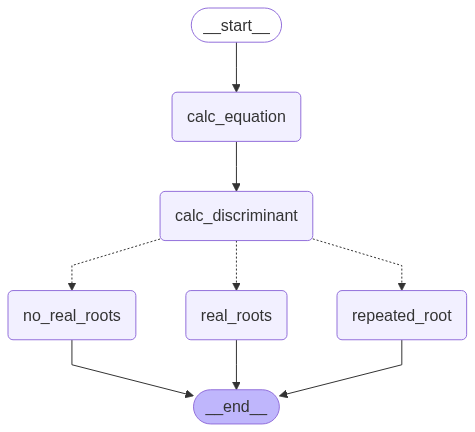

In [19]:
workflow

In [28]:
initial_state = {
    'a': 3,
    'b': 1,
    'c': 4
}

In [29]:
final_state = workflow.invoke(initial_state)
final_state

{'a': 3,
 'b': 1,
 'c': 4,
 'eq': '3x2 + 1x + 4',
 'discriminant': -47,
 'result': 'No real roots'}